# Clustering- Algglomerative

1. Agglomerative-hierarchical
2. DBSCAN


***These codes are imported from Scikit-Learn python package for learning purpose***

-------------------

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

### 1. Feature agglomeration

These images how similar features are merged together using
feature agglomeration.


* Code source: Gaël Varoquaux
* Modified for documentation by Jaques Grobler
*  License: BSD 3 clause

In [28]:
from sklearn import datasets, cluster
from sklearn.feature_extraction.image import grid_to_graph

In [29]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)

agglo.fit(X)
X_reduced = agglo.transform(X)

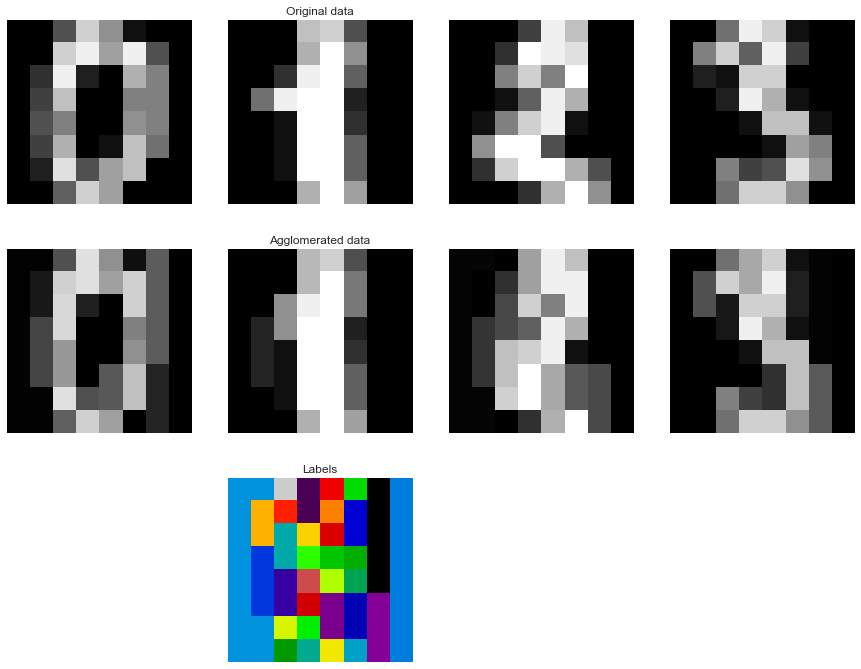

In [30]:
X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)


plt.figure(1, figsize=(12, 10))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title('Original data')
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16,
               interpolation='nearest')
    if i == 1:
        plt.title('Agglomerated data')
    plt.xticks(())
    plt.yticks(())

plt.subplot(3, 4, 10)
plt.imshow(np.reshape(agglo.labels_, images[0].shape),
           interpolation='nearest', cmap=plt.cm.spectral)
plt.xticks(())
plt.yticks(())
plt.title('Labels')
plt.show()

-------------------

### 2. Various Agglomerative Clustering on a 2D embedding of digits

#### LInkage: Ward,Average, Complete

An illustration of various linkage option for agglomerative clustering on
a 2D embedding of the digits dataset.

The goal of this example is to show intuitively how the metrics behave, and
not to find good clusters for the digits. This is why the example works on a
2D embedding.

What this example shows us is the behavior "rich getting richer" of
agglomerative clustering that tends to create uneven cluster sizes.
This behavior is especially pronounced for the average linkage strategy,
that ends up with a couple of singleton clusters.

*  Authors: Gael Varoquaux
* License: BSD 3 clause (C) INRIA 2014

In [31]:
from time import time
from scipy import ndimage
from sklearn import manifold, datasets

In [32]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

Computing embedding
Done.
ward : 0.41s
average : 0.37s
complete : 0.33s


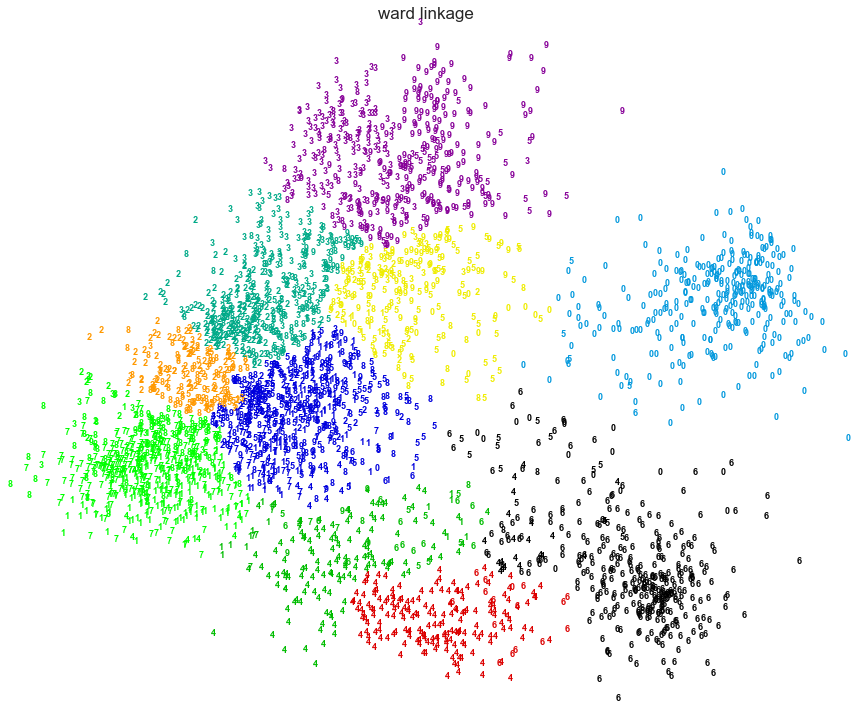

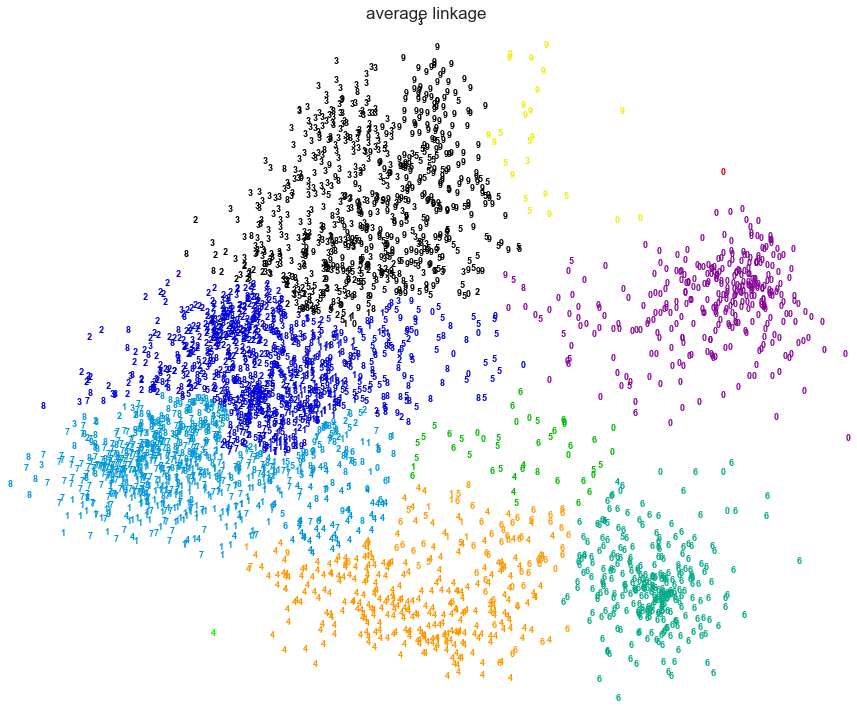

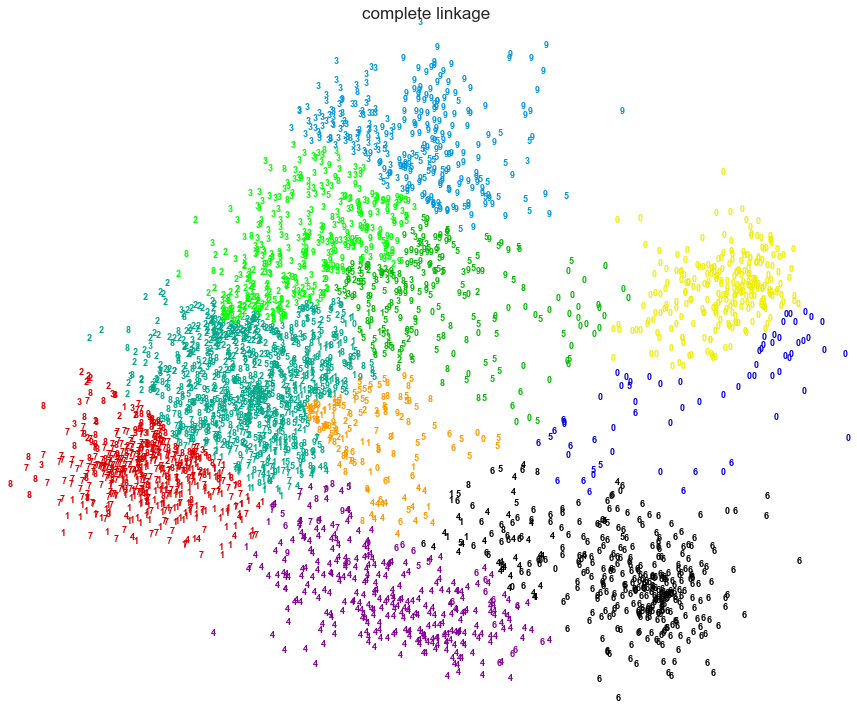

In [33]:
#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(12, 10))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

---------------

### 4. Hierarchical clustering: structured vs unstructured ward

Example builds a swiss roll dataset and runs
hierarchical clustering on their position.

For more information, see :ref:`hierarchical_clustering`.

In a first step, the hierarchical clustering is performed without connectivity
constraints on the structure and is solely based on distance, whereas in
a second step the clustering is restricted to the k-Nearest Neighbors
graph: it's a hierarchical clustering with structure prior.

Some of the clusters learned without connectivity constraints do not
respect the structure of the swiss roll and extend across different folds of
the manifolds. On the opposite, when opposing connectivity constraints,
the clusters form a nice parcellation of the swiss roll.


* Authors : Vincent Michel, 2010
           Alexandre Gramfort, 2010
           Gael Varoquaux, 2010
            
* License: BSD 3 clause

In [7]:
import time as time
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_swiss_roll


#### Generate data (swiss roll dataset)

In [8]:
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
# Make it thinner
X[:, 1] *= .5


#### Compute clustering

In [9]:

print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

Compute unstructured hierarchical clustering...
Elapsed time: 0.08s
Number of points: 1500


#### Results

Compute structured hierarchical clustering...
Elapsed time: 0.13s
Number of points: 1500


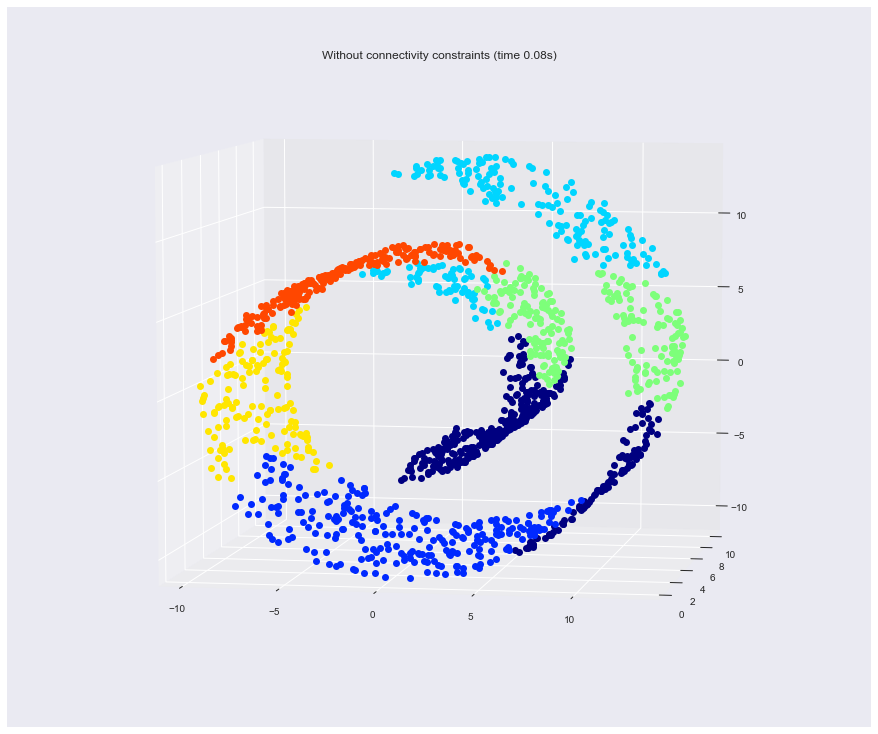

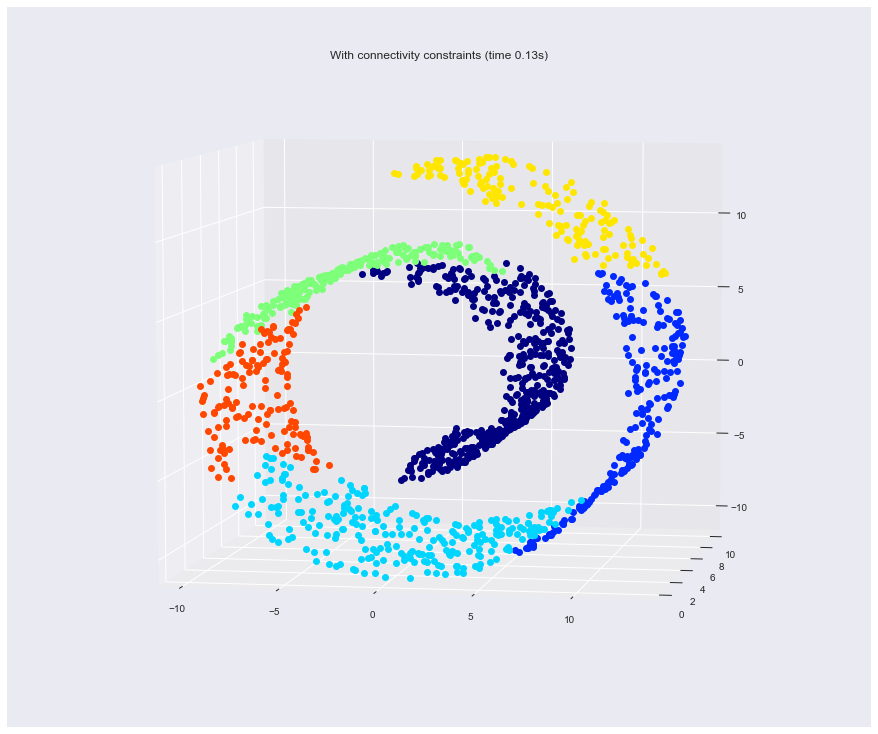

In [10]:
# Plot result
fig = plt.figure(figsize = [12,10])
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=plt.cm.jet(np.float(l) / np.max(label + 1)))
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time)

# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)


# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=6, connectivity=connectivity,
                               linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)


# Plot result
fig = plt.figure(figsize = [12,10])
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.plot3D(X[label == l, 0], X[label == l, 1], X[label == l, 2],
              'o', color=plt.cm.jet(float(l) / np.max(label + 1)))
plt.title('With connectivity constraints (time %.2fs)' % elapsed_time)

plt.show()


------------------

### 5. Feature agglomeration vs. univariate selection

This example compares 2 dimensionality reduction strategies:

- univariate feature selection with Anova

- feature agglomeration with Ward hierarchical clustering

Both methods are compared in a regression problem using
a BayesianRidge as supervised estimator.


* Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
* License: BSD 3 clause


In [15]:
import shutil
import tempfile

from scipy import linalg, ndimage

from sklearn.feature_extraction.image import grid_to_graph
from sklearn import feature_selection
from sklearn.cluster import FeatureAgglomeration
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import Pipeline
from sklearn.externals.joblib import Memory
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


#### Generate data

In [17]:
n_samples = 200
size = 40  # image size
roi_size = 15
snr = 5.
np.random.seed(0)
mask = np.ones([size, size], dtype=np.bool)

coef = np.zeros((size, size))
coef[0:roi_size, 0:roi_size] = -1.
coef[-roi_size:, -roi_size:] = 1.

X = np.random.randn(n_samples, size ** 2)
for x in X:  # smooth data
    x[:] = ndimage.gaussian_filter(x.reshape(size, size), sigma=1.0).ravel()
X -= X.mean(axis=0)
X /= X.std(axis=0)

y = np.dot(X, coef.ravel())
noise = np.random.randn(y.shape[0])
noise_coef = (linalg.norm(y, 2) / np.exp(snr / 20.)) / linalg.norm(noise, 2)
y += noise_coef * noise  # add noise


#### Compute the coefs of a Bayesian Ridge with GridSearch

In [18]:

cv = KFold(2)  # cross-validation generator for model selection
ridge = BayesianRidge()
cachedir = tempfile.mkdtemp()
mem = Memory(cachedir=cachedir, verbose=1)

#### Ward agglomeration followed by BayesianRidge

In [19]:

connectivity = grid_to_graph(n_x=size, n_y=size)
ward = FeatureAgglomeration(n_clusters=10, connectivity=connectivity,
                            memory=mem)
clf = Pipeline([('ward', ward), ('ridge', ridge)])

#### Select the optimal number of parcels with grid search

In [20]:

clf = GridSearchCV(clf, {'ward__n_clusters': [10, 20, 30]}, n_jobs=1, cv=cv)
clf.fit(X, y)  # set the best parameters
coef_ = clf.best_estimator_.steps[-1][1].coef_
coef_ = clf.best_estimator_.steps[0][1].inverse_transform(coef_)
coef_agglomeration_ = coef_.reshape(size, size)

________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[-0.451933, ..., -0.675318],
       ...,
       [ 0.275706, ..., -1.085711]]), 
<1600x1600 sparse matrix of type '<class 'numpy.int64'>'
	with 7840 stored elements in COOrdinate format>, n_clusters=None)
________________________________________________________ward_tree - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hierarchical.ward_tree...
ward_tree(array([[ 0.905206, ...,  0.161245],
       ...,
       [-0.849835, ..., -1.091621]]), 
<1600x1600 sparse matrix of type '<class 'numpy.int64'>'
	with 7840 stored elements in COOrdinate format>, n_clusters=None)
________________________________________________________ward_tree - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.cluster.hi

#### Anova univariate feature selection followed by BayesianRidge

In [21]:

f_regression = mem.cache(feature_selection.f_regression)  # caching function
anova = feature_selection.SelectPercentile(f_regression)
clf = Pipeline([('anova', anova), ('ridge', ridge)])
# Select the optimal percentage of features with grid search
clf = GridSearchCV(clf, {'anova__percentile': [5, 10, 20]}, cv=cv)
clf.fit(X, y)  # set the best parameters
coef_ = clf.best_estimator_.steps[-1][1].coef_
coef_ = clf.best_estimator_.steps[0][1].inverse_transform(coef_.reshape(1, -1))
coef_selection_ = coef_.reshape(size, size)


________________________________________________________________________________
[Memory] Calling sklearn.feature_selection.univariate_selection.f_regression...
f_regression(array([[-0.451933, ...,  0.275706],
       ...,
       [-0.675318, ..., -1.085711]]), 
array([ 25.267703, ..., -25.026711]))
_____________________________________________________f_regression - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.feature_selection.univariate_selection.f_regression...
f_regression(array([[ 0.905206, ..., -0.849835],
       ...,
       [ 0.161245, ..., -1.091621]]), 
array([ -27.447268, ..., -112.638768]))
_____________________________________________________f_regression - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.feature_selection.univariate_selection.f_regression...
f_regression(array([[ 0.905206, ..., -0.849835],
       ...,
       [-0.67531

#### Results

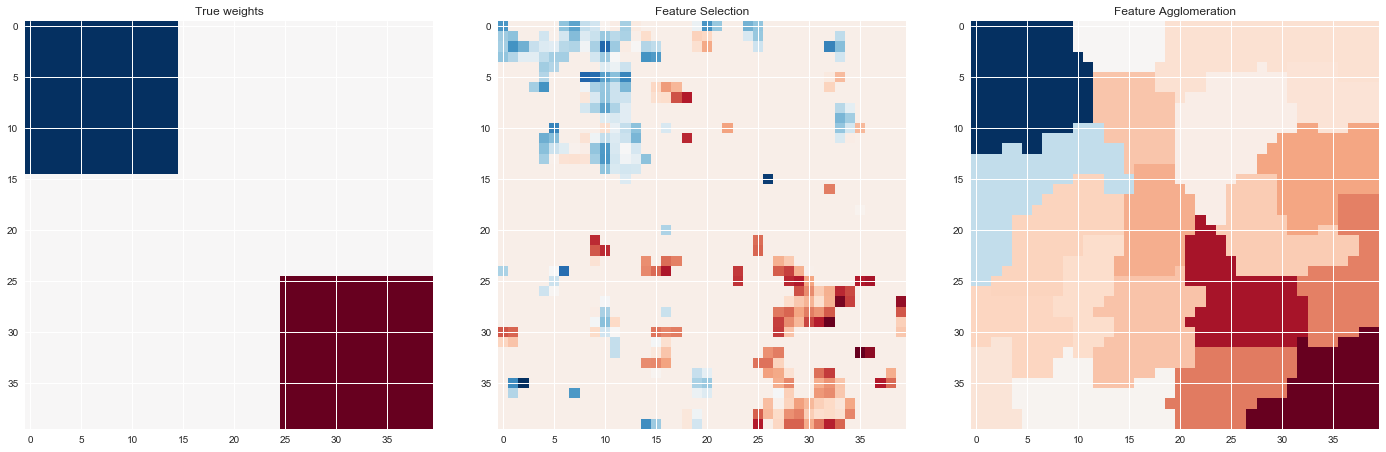

In [23]:
# Inverse the transformation to plot the results on an image
plt.close('all')
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.imshow(coef, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("True weights")
plt.subplot(1, 3, 2)
plt.imshow(coef_selection_, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("Feature Selection")
plt.subplot(1, 3, 3)
plt.imshow(coef_agglomeration_, interpolation="nearest", cmap=plt.cm.RdBu_r)
plt.title("Feature Agglomeration")
plt.subplots_adjust(0.04, 0.0, 0.98, 0.94, 0.16, 0.26)
plt.show()

# Attempt to remove the temporary cachedir, but don't worry if it fails
shutil.rmtree(cachedir, ignore_errors=True)


----------------------

### 6. Agglomerative clustering with and without structure

This example shows the effect of imposing a connectivity graph to capture
local structure in the data. The graph is simply the graph of 20 nearest
neighbors.

Two consequences of imposing a connectivity can be seen. First clustering
with a connectivity matrix is much faster.

Second, when using a connectivity matrix, average and complete linkage are
unstable and tend to create a few clusters that grow very quickly. Indeed,
average and complete linkage fight this percolation behavior by considering all
the distances between two clusters when merging them. The connectivity
graph breaks this mechanism. This effect is more pronounced for very
sparse graphs (try decreasing the number of neighbors in
kneighbors_graph) and with complete linkage. In particular, having a very
small number of neighbors in the graph, imposes a geometry that is
close to that of single linkage, which is well known to have this
percolation instability.

*  Authors: Gael Varoquaux, Nelle Varoquaux
*  License: BSD 3 clause

-------------------------

In [25]:
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

#### Generate sample data

In [ ]:

n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += .7 * np.random.randn(2, n_samples)
X = X.T


#### Results

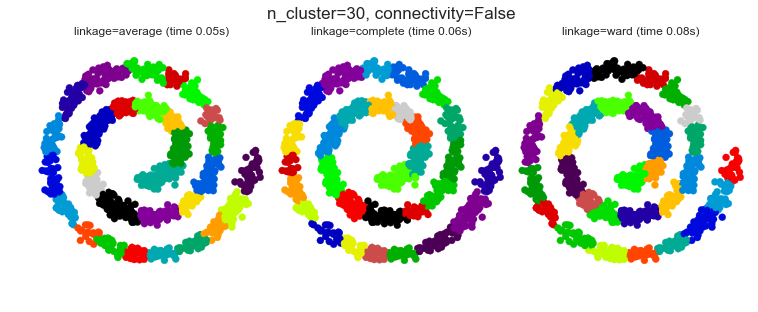

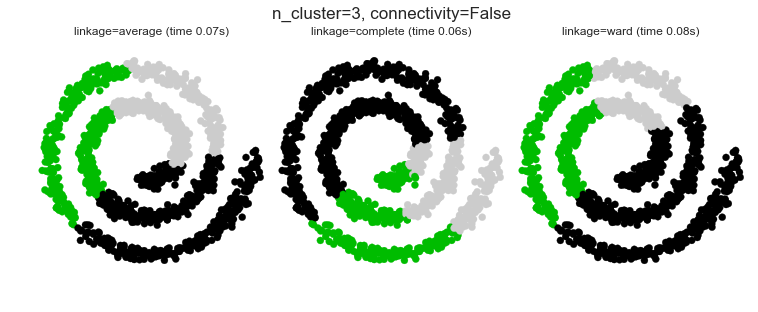

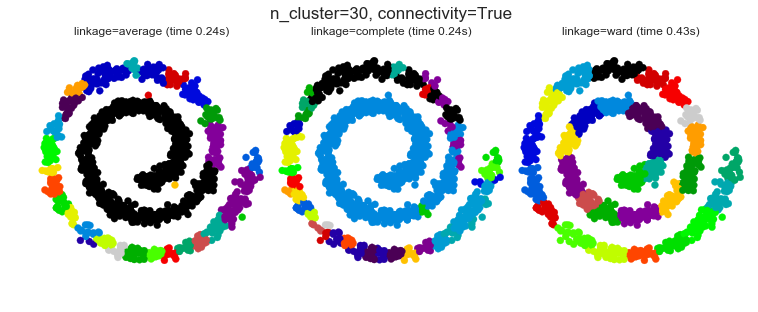

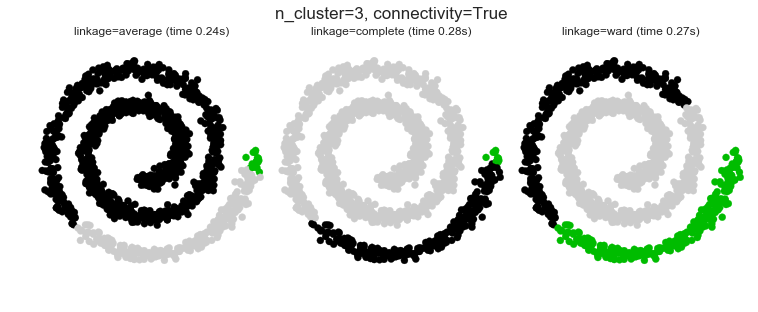

In [26]:
# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()


--------------

### 7. Agglomerative clustering with different metrics


Demonstrates the effect of different metrics on the hierarchical clustering.

The example is engineered to show the effect of the choice of different
metrics. It is applied to waveforms, which can be seen as
high-dimensional vector. Indeed, the difference between metrics is
usually more pronounced in high dimension (in particular for euclidean
and cityblock).

We generate data from three groups of waveforms. Two of the waveforms
(waveform 1 and waveform 2) are proportional one to the other. The cosine
distance is invariant to a scaling of the data, as a result, it cannot
distinguish these two waveforms. Thus even with no noise, clustering
using this distance will not separate out waveform 1 and 2.

We add observation noise to these waveforms. We generate very sparse
noise: only 6% of the time points contain noise. As a result, the
l1 norm of this noise (ie "cityblock" distance) is much smaller than it's
l2 norm ("euclidean" distance). This can be seen on the inter-class
distance matrices: the values on the diagonal, that characterize the
spread of the class, are much bigger for the Euclidean distance than for
the cityblock distance.

When we apply clustering to the data, we find that the clustering
reflects what was in the distance matrices. Indeed, for the Euclidean
distance, the classes are ill-separated because of the noise, and thus
the clustering does not separate the waveforms. For the cityblock
distance, the separation is good and the waveform classes are recovered.
Finally, the cosine distance does not separate at all waveform 1 and 2,
thus the clustering puts them in the same cluster.

*  Author: Gael Varoquaux
*  License: BSD 3-Clause or CC-0

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

##### Generate waveform data

In [37]:

n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))

X = list()
y = list()
for i, (phi, a) in enumerate([(.5, .15), (.5, .6), (.3, .2)]):
    for _ in range(30):
        phase_noise = .01 * np.random.normal()
        amplitude_noise = .04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < .997] = 0

        X.append(12 * ((a + amplitude_noise)
                 * (sqr(6 * (t + phi + phase_noise)))
                 + additional_noise))
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ('Waveform 1', 'Waveform 2', 'Waveform 3')


#### Results

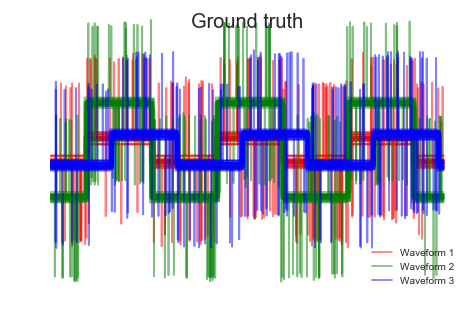

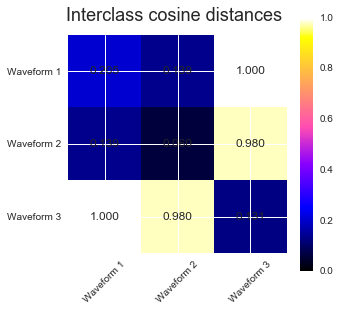

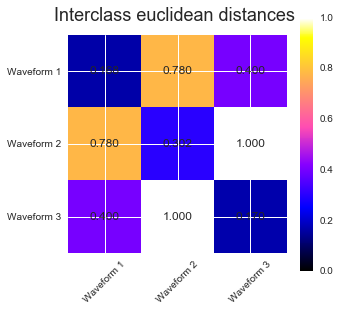

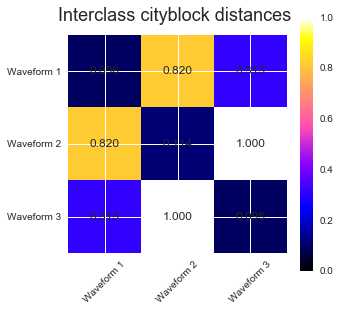

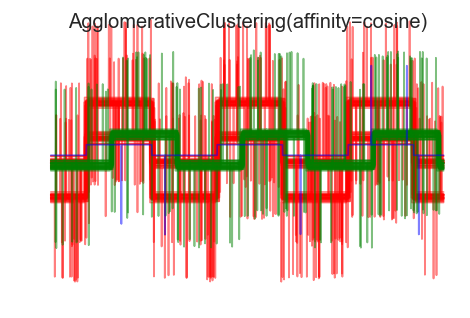

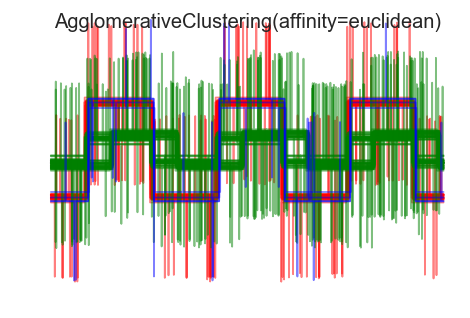

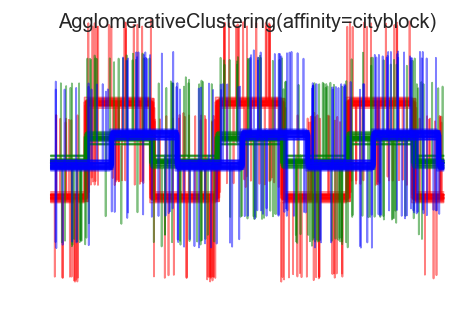

In [38]:
# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c, n in zip(range(n_clusters), 'rgb',
                   labels):
    lines = plt.plot(X[y == l].T, c=c, alpha=.5)
    lines[0].set_label(n)

plt.legend(loc='best')

plt.axis('tight')
plt.axis('off')
plt.suptitle("Ground truth", size=20)
# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                metric=metric).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            plt.text(i, j, '%5.3f' % avg_dist[i, j],
                     verticalalignment='center',
                     horizontalalignment='center')

    plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
               vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18)
    plt.tight_layout()


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage="average", affinity=metric)
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()



------------